In [1]:
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt


n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
X = StandardScaler().fit_transform(X)

In [2]:
single = cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
kmeans = cluster.KMeans(n_clusters=2)

In [3]:
kmeans.fit(X)
y2_pred = kmeans.predict(X)

In [4]:
single.fit(X)
y1_pred = single.labels_

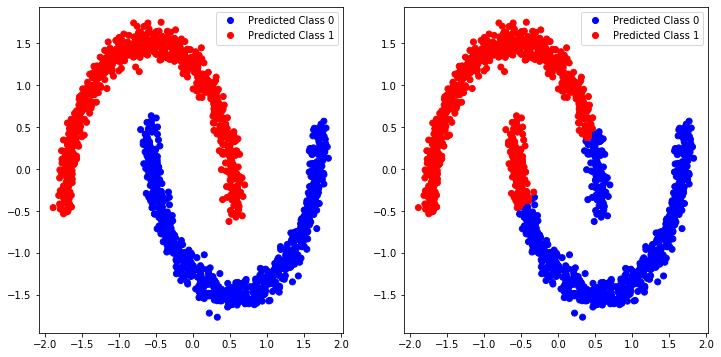

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
colors = np.array(['blue', 'red'])
legend_elems = [Line2D([0], [0], color=color, marker='o', linestyle='', label="Predicted Class {}".format(i))
                for i, color in enumerate(colors)]
ax[0].scatter(X[:, 0], X[:, 1], color=colors[y1_pred])
ax[0].legend(handles=legend_elems, loc='upper right')
ax[1].scatter(X[:, 0], X[:, 1], color=colors[y2_pred])
ax[1].legend(handles=legend_elems, loc='upper right')

In [6]:
print("Model 1 Silhouette Score: {}".format(silhouette_score(X, y1_pred)))
print("Model 2 Silhouette Score: {}".format(silhouette_score(X, y2_pred)))

Model 1 Silhouette Score: 0.39274801533199116
Model 2 Silhouette Score: 0.49939460013495884


In [7]:
X

array([[-0.80109463,  1.35666867],
       [-0.52004137,  0.1335777 ],
       [-0.11804219, -1.04977097],
       ...,
       [-1.63798897,  0.19393869],
       [-1.1423595 ,  1.51458088],
       [-0.30604988, -0.65175839]])

In [8]:
y1_pred

array([1, 0, 0, ..., 1, 1, 0])

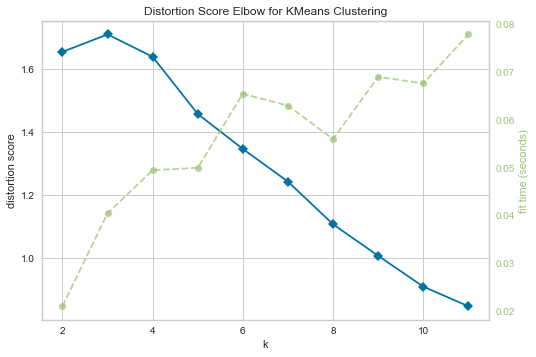

In [9]:
from yellowbrick.cluster import KElbowVisualizer

model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(X)
visualizer.poof()

In [21]:
## We will take a look at the his in the neural networks lesson

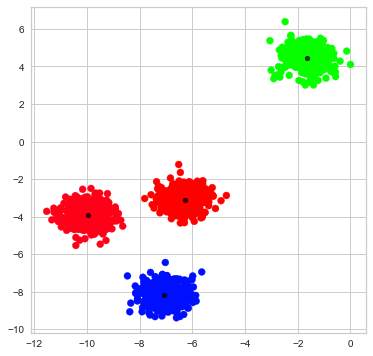

In [53]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
np.random.seed(1)

X, y = make_blobs(n_samples=1500, n_features =2, centers=4, cluster_std=0.5)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='hsv')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=25, alpha=0.75)

plt.show()

In [39]:
X

array([[ -1.26453956,   6.78239773,  -5.38481995, ...,   0.80977501,
         -5.71680896,  -3.09280407],
       [ -9.26585249,  -1.46690984,   9.1944599 , ...,   5.31985289,
         -8.78125722,   4.31021921],
       [ -0.90468834,   3.62185181,  -6.1923748 , ...,   3.78723814,
         -7.30193134,  -7.4787282 ],
       ...,
       [  1.47126071,   3.67263679, -10.69248871, ...,  -3.7204373 ,
         -3.95817084,  -0.66504587],
       [-10.53806852,  -2.13956918,   6.56427637, ...,   6.41695354,
        -12.33158161,   6.66908057],
       [  6.1324029 ,   8.01219997,  -3.73628337, ..., -11.91702302,
         -5.31301366,   5.93485561]])

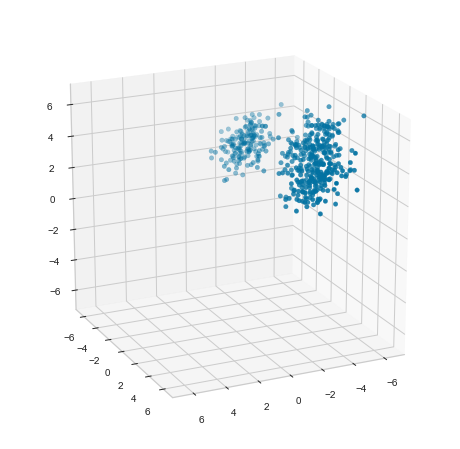

In [54]:
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

X, _ = make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=1.0)

X = np.c_[X, 0.5 * np.random.randn(X.shape[0], 1)]

rot = R.from_euler('y', 45, degrees=True)
X = rot.apply(X)

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)

ax.view_init(elev=20, azim=65)
plt.show()


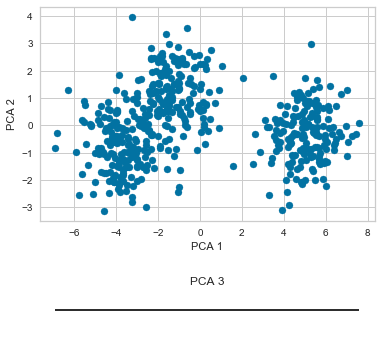

In [55]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
pca_X = pca.transform(X)

fig = plt.figure(figsize=(6, 6))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_X[:, 0], pca_X[:, 1])
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)
y = np.ones(X.shape[0])
ax[1].plot(pca_X[:, 2], y, '|', ms='20')
ax[1].axis('off')

plt.show()

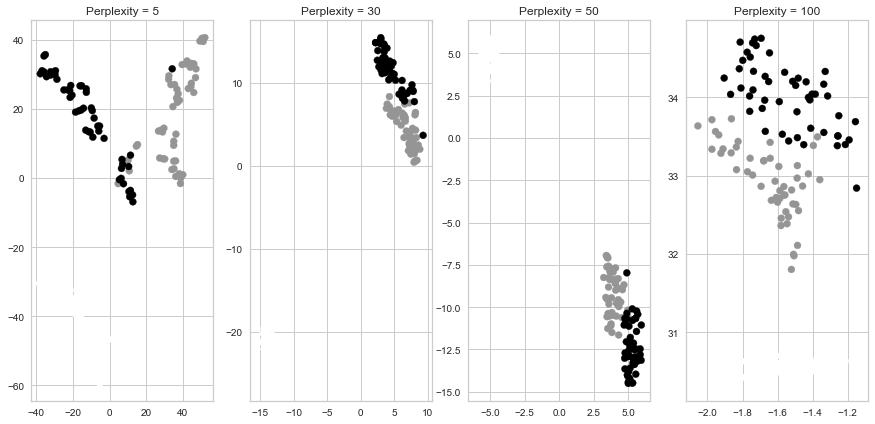

In [56]:
from sklearn.manifold import TSNE

X, y = datasets.load_iris(return_X_y=True)

fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=y)
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()
